# Phillips Problem

In [1]:
#Functions specific to the Phillips Problem

function u_Phillips(value)
    if(value isa Number)
        return -cos(pi*value)/pi
    else
        vector = zeros(length(value))
        for i=1:length(value)
            vector[i] = -cos(pi*value[i])/pi
        end
        return vector
    end
end

function dq_Phillips(value)  
    if(value isa Number)
        return pi*cos(pi*value)
    else
        vector = zeros(length(value))
        for i=1:length(value)
            vector[i] = pi*cos(pi*value[i])
        end
        return vector
    end
end

function S_Phillips(value)
    if(value isa Number)
        return 1
    else
        vector = zeros(length(value))
        for i=1:length(value)
            vector[i] = 1
        end
        return vector
    end
end
   
function du_Phillips(value)
    if(value isa Number)
        return sin(pi*value)
    else
        vector = zeros(length(value))
        for i=1:length(value)
            vector[i] = sin(pi*value[i])
        end
        return vector
    end
end
;

# Finite Difference Method

In [2]:
using PyPlot
include("FDLinearStability.jl")

#Use 280 to create a best approximate answer used below

#matrixSize = 280
matrixSize = 140

kxStart = .1
kxFinish = 4.
steps = 400
beta = 3.1
ky = 0

kxs_F = collect(LinRange(kxStart, kxFinish, steps))
growthRates_F, eVectors_F, waveSpeeds_F = growthRateEigenValues_fd(matrixSize, beta, ky, kxs_F, S_Phillips, u_Phillips)
;

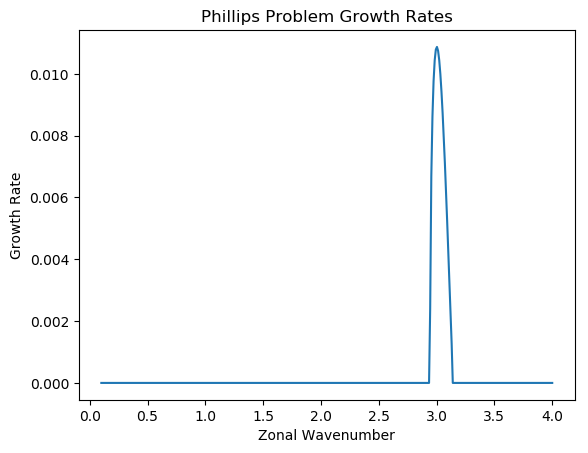

PyObject Text(24.0, 0.5, 'Growth Rate')

In [3]:
#Requires cell above to be run

plot(kxs_F,growthRates_F)
title("Phillips Problem Growth Rates")
xlabel("Zonal Wavenumber")
ylabel("Growth Rate")
#savefig("PhillipsProblem.eps", format="eps", dpi=1000)

In [4]:
nValues = 2 .^(3:6)

#Use below for larger range
#nValues = round.(Int64,10.0.^(LinRange(0.8, 2.408,15)))

bestValue_fd, bestKxIndex_Phil = findmax(growthRates_F)
growthRates_forN_Phil_fd = zeros(length(nValues))
kxValue_Phil = 3.
for i =1:length(nValues)
    matrixSize = nValues[i]
    growthRates_fd, vectors_F, w_speeds_F = growthRateEigenValues_fd(matrixSize, beta, ky, kxValue_Phil, S_Phillips, u_Phillips)
    growthRates_forN_Phil_fd[i] = growthRates_fd[1]
end
;

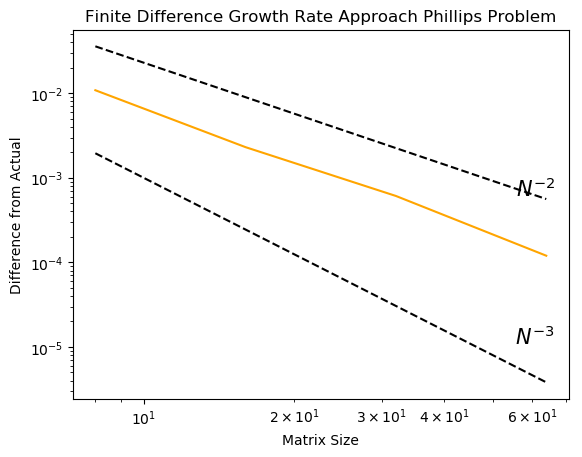

In [5]:
plot(nValues, abs.(growthRates_forN_Phil_fd.-bestValue_fd[1]), color="orange")
plot(nValues, 2.3*float(nValues).^-2, color="k", linestyle="dashed")
plot(nValues, float(nValues).^-3, color="k", linestyle="dashed")
xscale("log")
yscale("log")
title("Finite Difference Growth Rate Approach Phillips Problem")
xlabel("Matrix Size")
ylabel("Difference from Actual")
annotate(L"$N^{-2}$",
	xy=[1;0.5],
	xycoords="axes fraction",
	xytext=[-10,10],
	textcoords="offset points",
	fontsize=15.0,
	ha="right",
	va="bottom")
annotate(L"$N^{-3}$",
	xy=[1;0.1],
	xycoords="axes fraction",
	xytext=[-10,10],
	textcoords="offset points",
	fontsize=15.0,
	ha="right",
	va="bottom")
savefig("PhillipsProblemFDApproach.eps", format="eps", dpi=1000)

# Galerkin and Chebyshev Methods

In [6]:
using PyPlot
include("GalerkinLinearStability.jl")
include("ChebyshevLinearStability.jl")

first_coefficient = 0.0
beta = 3.1
ky = 0
kxValue = 3.

#Creating best approximation using a matrix size larger than will be used next.
matrixSize = 90
eigenValuesAndVectors = getCompleteStabilityEigenObjectsOfKx(matrixSize, beta, ky, kxValue, S_Phillips, dq_Phillips, du_Phillips, 0, 0, first_coefficient)
growthRates_G_Best, vectors_G, w_speeds_G = getStabilityValues(eigenValuesAndVectors, kxValue)

;

In [7]:
nValues = 2 .^(2:6)

growthRates_G = zeros(length(nValues))
growthRates_C = zeros(length(nValues))

kxValue = 3.
for i =1:length(nValues)
    matrixSize = nValues[i]
    println("Working on $matrixSize")
    
    #Galerkin
    eigenValuesAndVectors = getCompleteStabilityEigenObjectsOfKx(matrixSize, beta, ky, kxValue, S_Phillips, dq_Phillips, du_Phillips, 0, 0, first_coefficient)
    growthRate, vectors, w_speeds = getStabilityValues(eigenValuesAndVectors, kxValue)
    growthRates_G[i] = growthRate[1]
    
    #Chebyshev
    growthRate, vectors_C, w_speeds_C = growthRateEigenValues_Cheb(matrixSize, beta, ky, kxValue, S_Phillips, dq_Phillips, 0, 0, u_Phillips(0.0))
    growthRates_C[i] = growthRate[1]
end
println("Done")
;

Working on 4
Working on 8
Working on 16
Working on 32
Working on 64
Done


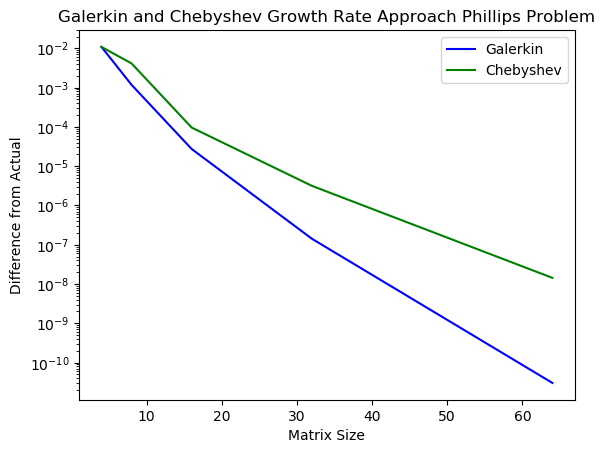

PyObject Text(24.000000000000007, 0.5, 'Difference from Actual')

In [9]:
bestPoint = growthRates_G_Best[1]
plot(nValues, abs.(growthRates_G .-bestPoint), label="Galerkin", color="b" )
plot(nValues, abs.(growthRates_C .-bestPoint), label="Chebyshev", color="g")
yscale("log")
title("Galerkin and Chebyshev Growth Rate Approach Phillips Problem")
legend(loc="upper right")
xlabel("Matrix Size")
ylabel("Difference from Actual")
#savefig("PhillipsProblemApproachFull.eps", format="eps", dpi=1000)